## <a id='top'></a>

# CSCI 3202, Fall 2020
# Assignment 2
# Due: Monday 16 November 2020 by 11:59 PM

<br> 

### Your name: Kelley Kelley

<br> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate
import unittest
# since PDF uses isclose I'm going to import it
from math import isclose


## Problem 1:  EVIU and EVPI

Suppose we have an overwhelming sense of exam déjà vu, and we're going to catch the Buff Bus again.  We want to decide at what time $d$ to go wait for it.  We decide to use the the linear loss function 

$$L(d,x)=\begin{cases} 
	2(x-d) & x\geq d \\
	4(d-x) & x <d
    	\end{cases}$$.
        
As in the exam, we model the Buff Bus arrival times as an exponential random variable $X$ that arrives on average once per hour, so they have probability density function of $f(x)=e^{-x}$ for $x>0$ (note: this has mean of $E_X[x]=1$).

The result from the exam was that the *expected loss* of the decision $d$ was:
$$E_X[L(d,x)] = \int_0^d 4(d-x)e^{-x}\, dx + \int_d^\infty 2(x-d)e^{-x}\, dx$$

...we maybe tried to avoid doing that integral and reasoned through it, because often such an integral is messy and may require numerical methods.


### (1a)  A Loss function:

Create a `ExpectedLoss` object or function that takes as input 3 arguments: 
    - a decision $d$
    - a loss function $L(d,x)$
    - a probability density $f(x)$

and returns the value of $$E_X[L(d,x)]=\int_{-\infty}^\infty L(d,x) f(x) \, dx$$.

Inside your function, you can and should use the scipy.integrate function with documentation: 
https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html.



In [2]:
def ExpectedLoss(decision, loss_function, prob_density):
    f = lambda x: loss_function(x, decision) * prob_density(x)
    # so you said from -inf to inf but that makes no sense in this problem and won't work
    # bc constantly spitting out nan, so I'm doing 0 instead bc that's what we want even and
    # having - makes no sense
    value1, error1 = integrate.quad(f, 0, decision)
    value2, error2 = integrate.quad(f, decision, float('inf'))
    return (value1 + value2)

## (1b) A quick check:
Double check that your integrate code is working well on the infinite support of the exponential random variable.  Check that you in fact get $$E[X]=\int_0^\infty e^{-x} \, dx=1$$ from your usage of `integrate` above.

In [3]:
def expon(x):
    return np.exp(-x)

value, error = integrate.quad(expon, 0, np.inf)
print('value:',value,', error:',error)

def testing(x, d):
    return np.exp(-x)*d
value, error = integrate.quad(testing, 0, np.inf, args=(2))
#print(value)

value: 1.0000000000000002 , error: 5.842606996763696e-11


## (1c) Scoring Decisions:
Our goal is typically to compare the losses of 3 decision types:
 - the decision made "ignoring uncertainty," using $d=E[X]$
 - the decision made with "perfect information", using $d=x$
 - the decision made with uncertainty to minimize loss, the Bayes' decision.
 
1. Use your function in (1a) to compute the expected loss when ignoring uncertainty.

2. Use your function in (1a) or reason to compute the expected loss with perfect information.

3. Use your function in (1a) to *plot* the expected loss for a fine grid (`linspace`) of $d$ values from 0 to 10.  Given this plot, visually estimate the optimal decision $d$ and it's expected loss.

Loss ignoring uncertainty =  2.207276647028654
Loss with perfect information =  0.0


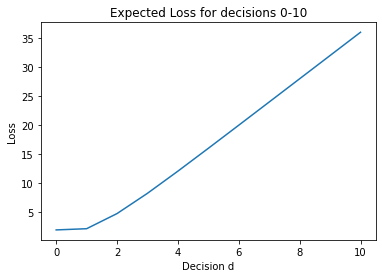

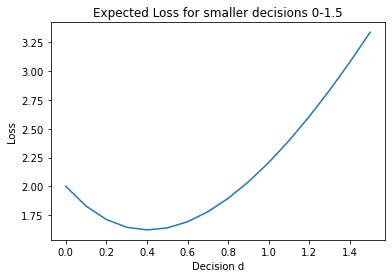

In [4]:
def loss(x, d):
    if x < d:
        return 4.0*(d-x)
    else:
        return 2.0*(x-d)

def loss_perfect(x, d):
    return 0

value = ExpectedLoss(1, loss, expon)
print('Loss ignoring uncertainty = ', value)
value = ExpectedLoss(1, loss_perfect, expon)
print('Loss with perfect information = ', value) # as expected, I feel like I really don't get the point of perfect information loss
# isn't it always 0? what's the point of even having it then? 
values = []
for i in range(0, 11):
    values.append(ExpectedLoss(i, loss, expon))

plt.plot(values)
plt.xlabel('Decision d')
plt.ylabel('Loss')
plt.title('Expected Loss for decisions 0-10')
plt.show()
# the value is kind of hard to see on this plot so
values = []
for i in range(0, 16):
    values.append(ExpectedLoss(i/10, loss, expon))
    
plt.plot([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], values)
plt.xlabel('Decision d')
plt.ylabel('Loss')
plt.title('Expected Loss for smaller decisions 0-1.5')
plt.show()
# based on the first graph it looked to be a little short of 1 hour so 0.8 ish but now that I can see it much more clearly
# based on plot 2 it is about 0.4 hours

## (1d) Optimizing Decisions:
Since the Bayes' decision should be the minimum of the function in (1a), we can use another numeric method in Python to find it exactly!  Check out `scipy.optimize` https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html and use it to find the Bayes' decision.

For convenience, you may restructure your code in (1a) to get the loss function while only $d$ as taken as an input.

In [5]:
# I'm going to import scipy.optimize bc obviously we can use it
from scipy.optimize import minimize
# new loss function that only takes in d
def newloss(d):
    return ExpectedLoss(d, loss, expon)

print('Bayes Decision that minimizes loss =', minimize(newloss, x0=1).x)


Bayes Decision that minimizes loss = [0.40546505]


## (1e) Bigger Losses
$$L_l(d,x)=\begin{cases} 
	20(d-x) & x \leq d \\
	200+20(d-x) & x> d \\		
	\end{cases}$$.
    
Consider instead the loss function above, which contains a large jump at $x=d$.  Use your `ExpectedLoss` and/or `optimize` routines to find the Bayes' decision for the bus-waiting problem in this case, where a large amount of utility is lost as soon as $x>d$ (or we miss the bus).  Does your result here seem intuitive, given the Bayes' decision in parts (1c/1d)?

Bayes Decision that minimizes loss = [2.48490667]


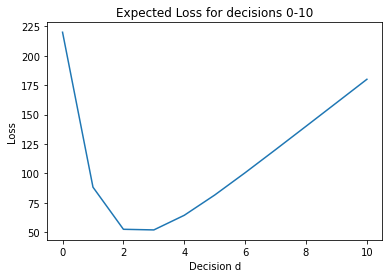

In [6]:
def loss(x, d):
    if x < d:
        return 20.0*(d-x)
    else:
        return 200.0+20*(x-d)
    
# now the decision should be even sooner since our loss is huge as soon as the bus arrives so we definetly don't want to ever miss it
def newloss(d):
    return ExpectedLoss(d, loss, expon)

print('Bayes Decision that minimizes loss =', minimize(newloss, x0=1).x)
values = []
for i in range(0, 11):
    values.append(ExpectedLoss(i, loss, expon))

plt.plot(values)
plt.xlabel('Decision d')
plt.ylabel('Loss')
plt.title('Expected Loss for decisions 0-10')
plt.show()
# ok, originally I said what I said above, but now I realize x > d means our decision was before the bus arrived, which means we really
# hate waiting on the bus so it makes sense our loss is now after the bus arrives. I think that's an error in the explanation
# above. x > d means our decision came before the random variable x where x is when the bus arrives, this means d
# was before bus, therefore based on the loss function above, it sucks to be before the bus a lot more than right after
# which makes no sense but poses this interesting graph and makes an interesting switch for dbayes bc now we want to arrive
# after the bus which is kind of funny


## Problem 2:  Bayesian network to model heart disease

The following Bayesian network is based loosely on a study that examined heart disease risk factors in 167 elderly individuals in South Carolina.  Note that this figure uses Y and N to represent Yes and No, whereas in class we used the equivalent T and F to represent True and False Boolean values.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw05_bayesnet_heartdisease.png" style="width: 650px;"/>

<a id='p1a'></a>

### (2a) 

Create a `BayesNet` object to model this.  Below are the codes for the (conditional) probability `P` function and `BayesNode` class as well, that we used in class on Monday (9 March) to represent the variable nodes and calculate probabilities. You can code this however you want, subject to the following constraints:
1. the nodes are represented using the `BayesNode` class and can work with the `P` function for probabilities,
1. your `BayesNet` structure keeps track of which nodes are in the Bayes net, as well as
1. which nodes are the parents/children of which other nodes.

Some *suggested* skeleton codes for a class structure are given. You are free and encouraged to use the code from our in-class notebooks on Bayes Nets and Markov Models. The point of this exercise is to make sure you understand the example from class. The suggestions for methods to implement are in view of the fact that we will need to calculate some probabilities, which is going to require us to `find_node`s and `find_values` that nodes can take on.

In [7]:
## For the sake of brevity...
T, F = True, False

## From class:
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
    return var.cpt[row] if value else 1-var.cpt[row]

## Also from class:
class BayesNode:
    
    def __init__(self, name, parents, values, cpt):
        if isinstance(parents, str):
            parents = parents.split()
            
        if len(parents)==0:
            # if no parents, empty dict key for cpt
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # if there is only one parent, only one tuple argument
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v): p for v, p in cpt.items()}

        self.variable = name
        self.parents = parents
        self.cpt = cpt
        self.values = values
        self.children = []
        
    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))   
    
    def test(self):
        string = str(self.variable) + ", " + str(self.parents) + ", " + str(self.children)
        string1 = str(self.cpt)
        string2 = str(self.values)
        return [string, string1, string2]

    
##===============================================##
## Suggested codes for a BayesNet class ##
##===============================================##

class BayesNet:
    '''Bayesian network containing only boolean-variable nodes.'''

    def __init__(self, nodes):
        '''Initialize the Bayes net by adding each of the nodes,
        which should be a list BayesNode class objects ordered
        from parents to children (`top` to `bottom`, from causes
        to effects)'''
        
        # your code goes here...
        self.nodes = []
        self.variables = []
        for node in nodes:
            self.add(node)

                
    def add(self, node):
        '''Add a new BayesNode to the BayesNet. The parents should all
        already be in the net, and the variable itself should not be'''
        assert node.variable not in self.variables
        assert all((parent in self.variables) for parent in node.parents)
        
        # your code goes here...
        self.nodes.append(node)
        self.variables.append(node.variable)
        #print(node.test())
        for parent in node.parents:
            #print(parent.test())
            self.find_node(parent).children.append(node.variable)
        #print(node.test())

            
    def find_node(self, var):
        '''Find and return the BayesNode in the net with name `var`'''
        
        # your code goes here...
        for node in self.nodes:
            if node.variable == var:
                return node
        raise Exception("Node {} not found".format(var))

        
    def find_values(self, var):
        '''Return the set of possible values for variable `var`'''
        
        # your code goes here...
        node = self.find_node(var)
        return node.values


    
    def __repr__(self):
        return 'BayesNet({})'.format(self.nodes)
    
    def test(self):
        node_test = []
        for node in self.nodes:
            string = 'Node:' + str(node.variable) + ', Parents:' + str(node.parents) + ', cpt:' + str(node.cpt) + ', values:' + str(node.values) + ', Children:' + str(node.children)
            node_test.append(string)
        return node_test
    

In [8]:
# Create a Bayes net with those nodes and connections
Y, N = True, False
Sm = BayesNode('Sm', '', [Y,N], 0.20)
ME = BayesNode('ME', '', [Y,N], 0.50)
HBP = BayesNode('HBP', ['Sm','ME'], [Y,N], {(Y,Y): 0.60, (Y,N): 0.72, (N,Y): 0.33, (N,N): 0.51})
Ath = BayesNode('Ath', '', [Y,N], 0.53)
FH = BayesNode('FH', '', [Y,N], 0.15)
HD = BayesNode('HD', ['HBP','Ath','FH'], [Y,N], {
    (Y,Y,Y): 0.92,
    (Y,Y,N): 0.91,
    (Y,N,Y): 0.81,
    (Y,N,N): 0.77,
    (N,Y,Y): 0.75,
    (N,Y,N): 0.69,
    (N,N,Y): 0.38,
    (N,N,N): 0.23
})
Ang = BayesNode('Ang', 'HD', [Y,N], {T: 0.85, F: 0.40})
Rapid = BayesNode('Rapid', 'HD', [Y,N], {T: 0.99, F: 0.30})
Model_heart_disease_net = BayesNet([Sm, ME, HBP, Ath, FH, HD, Ang, Rapid])
#Model_heart_disease_net.__repr__()
#testing = Model_heart_disease_net.test()
#for line in testing:
#    print(line)

'''
for line in Sm.test():
    print(line)
 
for line in ME.test():
    print(line)
 
for line in HBP.test():
    print(line)
 
for line in Ath.test():
    print(line)
 
for line in FH.test():
    print(line)
    
for line in HD.test():
    print(line)

for line in Ang.test():
    print(line)
    
for line in Rapid.test():
    print(line)
    
'''

'\nfor line in Sm.test():\n    print(line)\n \nfor line in ME.test():\n    print(line)\n \nfor line in HBP.test():\n    print(line)\n \nfor line in Ath.test():\n    print(line)\n \nfor line in FH.test():\n    print(line)\n    \nfor line in HD.test():\n    print(line)\n\nfor line in Ang.test():\n    print(line)\n    \nfor line in Rapid.test():\n    print(line)\n    \n'

In [9]:
class Tests_Problem2(unittest.TestCase):
    def setUp(self):
        self.p1 = BayesNode('p1', '', [T,F], 0.3)
        self.p2 = BayesNode('p2', '', [T,F], 0.6)
        self.c  = BayesNode('c', ['p1', 'p2'], [T,F], {(T,T):0.1, (T,F):0.2, (F,T):0.3, (F,F):0.4})
    def test_onenode(self):
        self.assertEqual(P(self.p1, T), 0.3)
    def test_twonode(self):
        self.assertEqual(P(self.c, F, {'p1':T, 'p2':F}), 0.8)

In [10]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem2("test_onenode"))
tests_to_run.addTest(Tests_Problem2("test_twonode"))
unittest.TextTestRunner().run(tests_to_run)

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>


### (2b)

Craft a function `get_prob(X, e, bn)` to return the **normalized** probability distribution of variable `X` in Bayes net `bn`, given the evidence `e`.  That is, return $P(X \mid e)$. The arguments are:
* `X` is some representation of the variable you are querying the probability distribution of. Either a string (the variable name from the `BayesNode` or a `BayesNode` object itself are good options.
* `e` is some representation of the evidence your probability is conditioned on. When given an empty argument (or `None`) for `e`, `get_prob` should return the marginal distribution $P(X)$.
* `bn` is your `BayesNet` object.

You may do this using the `enumeration` algorithm from class (pseudocode is in the book), or by brute force (i.e., use a few `for` loops). Either way, you should be using your `BayesNet` object to keep track of all the nodes and relationships between nodes so your `get_prob` function knows these things.

Suggest implementation is below, where we use the `PDF_discrete` class and its associated functions as we did in the Bayes Nets in class notebook.

In [11]:
# Solution:

class PDF_discrete:
    '''Define a discrete probability distribution function.'''

    def __init__(self, varname='?', freqs=None):
        '''Create a dictionary of values - frequency pairs,
        then normalize the distribution to sum to 1.'''
        self.prob = {}
        self.varname = varname
        self.values = []
        if freqs:
            for (v, p) in freqs.items():
                self[v] = p
        self.normalize()

    def __getitem__(self, value):
        '''Given a value, return P[value]'''
        try:
            return self.prob[value]
        except KeyError:
            return 0

    def __setitem__(self, value, p):
        '''Set P[value] = p, input argument if '''
        if value not in self.values:
            self.values.append(value)
        self.prob[value] = p

    def normalize(self):
        '''Normalize the probability distribution and return it.
        If the sum of PDF values is 0, then return a 0'''
        total = sum(self.prob.values())
        if not isclose(total, 1.0):
            for value in self.prob:
                self.prob[value] /= total
        return self
    
def extend(s, var, val):
    """Copy the substitution s and extend it by setting var to val; return copy."""
    s2 = s.copy()
    s2[var] = val
    return s2

def get_prob(X, e, bn):
    '''Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn. [Figure 14.9]'''

    # Your code here.
    # P(X | e) = alpha P(X)P(e|X)
    # don't have to worry about alpha bc normalizing instead
    # P(e | X) = sum of possible parent values assuming X true, P(e | parents)
    # which is handled by enumerate_all
    Q = PDF_discrete(X)
    for xi in bn.find_values(X):
        Q[xi] = enumerate_all(bn.variables, extend(e, X, xi), bn)
    return Q.normalize()

def enumerate_all(variables, e, bn):
    '''Return the sum of those entries in P(variables | e{others})
    consistent with e, where P is the joint distribution represented
    by bn, and e{others} means e restricted to bn's other variables
    (the ones other than variables). Parents must precede children in variables.'''

    # Your code here... or consult the in-class notebook for working example
    # base case when we return bc did all the variables
    if not variables:
        return 1.0
    # recursion, take out the first thing from the list and call enumerate_all on the rest
    Y, rest = variables[0], variables[1:]
    Ynode = bn.find_node(Y)
    # if Y is in our evidence
    if Y in e:
        # multiply our Proabability call on the rest
        return P(Ynode, e[Y], e) * enumerate_all(rest, e, bn)
    else:
        # sum up all our possibles which is also a sum of possibles so y in find_values to get all nodes to iterate over
        return sum(P(Ynode, y, e) * enumerate_all(rest, extend(e, Y, y), bn)
                  for y in bn.find_values(Y))

### (2c)
Use your `get_prob` function to calculate the following probabilities. Print them to the screen and compare to the original Bayes net figure given to make sure the output passes these "unit tests".

1. The marginal probability of `Family History` is $P(FH=T)=0.15$
2. The probability of *not* experiencing `Angina Pectoris`, given `Heart Disease` is observed, is $P(Ang=F \mid HD=T)=1-0.85=0.15$
3. The probability of `High Blood Pressure`, given a person does `Smoke and/or use Alcohol` but does not get `Moderate Exercise`, is $P(HBP=T \mid Sm=T, ME=F)=0.72$
4. The probability of an arbitrary individual having Heart Disease,  P(HD=T)P(HD=T)
5. The probability that an individual does not have Heart Disease, given that Rapid Heartbeat was observed,  P(HD=F∣Rapid=T)P(HD=F∣Rapid=T)
6. The probability that an individual is a `Smoker/Alcohol User` if they have `Heart Disease`, $P(Sm=T \mid HD=T)$
7. How would you expect the probability in 6. to change if you also know the individual has `High Blood Pressure`?  Verify your hypothesis by calculating the relevant probability.

In [12]:
bntest = Model_heart_disease_net
one = get_prob('FH', {}, bntest)
print('1:', one.prob[True])
two = get_prob('Ang', {'HD': Y}, bntest)
print('2:', two.prob[False])
three = get_prob('HBP', {'Sm': Y, 'ME': F}, bntest)
print('3:', three.prob[True])
four = get_prob('HD', {}, bntest)
print('4:', four.prob[True])
five = get_prob('HD', {'Rapid': N}, bntest)
print('5:', five.prob[False])
six = get_prob('Sm', {'HD': Y}, bntest)
print('6:', six.prob[True])
# I would expect the probability to go up since you now know HBP and HBP is a child of Sm which means we have a more direct relation to
# Sm than when we just had HD and according to our figure knowing HBP is True we can conclude that it's higher risk of HD
seven = get_prob('Sm', {'HD': Y, 'HBP': Y}, bntest)
print('7:', seven.prob[True])
# my own tests
#print(get_prob('HBP', {'Sm': Y, 'ME': N}, bntest).prob) #close enough to our table
#print(get_prob('HD', {'Ath': Y, 'HBP': Y, 'FH': N}, bntest).prob)

1: 0.15
2: 0.1500000000000001
3: 0.7199999999999999
4: 0.65700256
5: 0.9733649302785619
6: 0.22096327904719273
7: 0.282051282051282


### (2d)
Rather than exact calculations, we can also *simulate* on a Bayesian Network.  Simulate 10000 hypothetical elderly individuals from South Carolina on the given network.  Using logicals, compute the probabilities in numbers (6.) and (7.) of part (2c) and verify that they are approximately equivalent.

No API is required here, but your final result should print the empirical (simulated) probabilities next to the exact theoretical results for these two outcomes from (2c).

In [13]:
#Recommended simulation structure:
#Set up same BayesNodes or Conditional Probability Tables as in (2a)
Y, N = True, False
Sm = BayesNode('Sm', '', [Y,N], 0.20)
ME = BayesNode('ME', '', [Y,N], 0.50)
HBP = BayesNode('HBP', ['Sm','ME'], [Y,N], {(Y,Y): 0.60, (Y,N): 0.72, (N,Y): 0.33, (N,N): 0.51})
Ath = BayesNode('Ath', '', [Y,N], 0.53)
FH = BayesNode('FH', '', [Y,N], 0.15)
HD = BayesNode('HD', ['HBP','Ath','FH'], [Y,N], {
    (Y,Y,Y): 0.92,
    (Y,Y,N): 0.91,
    (Y,N,Y): 0.81,
    (Y,N,N): 0.77,
    (N,Y,Y): 0.75,
    (N,Y,N): 0.69,
    (N,N,Y): 0.38,
    (N,N,N): 0.23
})
Ang = BayesNode('Ang', 'HD', [Y,N], {T: 0.85, F: 0.40})
Rapid = BayesNode('Rapid', 'HD', [Y,N], {T: 0.99, F: 0.30})
# here is a list of our variables
variable_list = [Sm, ME, HBP, Ath, FH, HD, Ang, Rapid]

Model = BayesNet(variable_list)

# tesing how to get prob and random select
probability = get_prob('HD', {'Ath': Y, 'HBP': Y, 'FH': N}, Model).prob
#print(probability)
#print(list(probability.values()))
#print(np.random.choice([Y, N], p=list(probability.values())))

simulation = []

#For 10000 samples...
for i in range(0, 10000):
    # this is our dictionary of evidence so far
    e = {}
    # they are in order of parents to children so cool
    for node in variable_list:
        probability = get_prob(node.variable, e, Model).prob
        if np.random.choice([Y, N], p=list(probability.values())):
            e[node.variable] = Y
        else:
            e[node.variable] = N
    simulation.append(e)
        
#print(simulation)

In [14]:
# All of the times our given and evidence were true
# divided by the number of times our evidence were true

# problem six
# all of the times Sm and HD were true / all the times HD was true
numerator = 0
denominator = 0
for dictionary in simulation:
    if dictionary['HD']:
        denominator += 1
        if dictionary['Sm']:
            numerator += 1
print('6:', numerator/denominator)

# problem seven
# all of the times Sm, HD, and HBP were true / all the times HD and HBP were true
numerator = 0
denominator = 0
for dictionary in simulation:
    if dictionary['HD'] and dictionary['HBP']:
        denominator += 1
        if dictionary['Sm']:
            numerator += 1
            
print('7:', numerator/denominator)
# those are darn close to my other values so yay
# just in case more tests
numerator = 0
for dictionary in simulation:
    if dictionary['FH']:
        numerator += 1
print('1:', numerator/len(simulation))

6: 0.22564338235294118
7: 0.2879170879676441
1: 0.1501
